<a href="https://colab.research.google.com/github/Litoriashiv/QT-2-project/blob/main/boston_housing_complete_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete Boston Housing Analysis: EDA + Regression

**Comprehensive end-to-end analysis covering:**
- Part 1: Exploratory Data Analysis (10 sections)
- Part 2: Regression Analysis (Multiple Linear & Logistic Regression)

---


## Load Required Libraries

In [ ]:
# Install packages if needed (uncomment if required)
install.packages('IRkernel')

install.packages(c('mlbench', 'ggplot2', 'dplyr', 'tidyr', 'corrplot', 'gridExtra', 'scales', 'psych', 'car', 'moments', 'GGally', 'viridis'))

library(mlbench)
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(gridExtra)
library(scales)
library(psych)
library(car)
library(moments)
library(GGally)
library(viridis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load Dataset

In [ ]:
data("BostonHousing2", package = "mlbench")
boston <- BostonHousing2

## 1. Data Structure & Quality Checks

In [ ]:
cat("=== DATA STRUCTURE ===\n")
str(boston)
cat("\n=== DIMENSIONS ===\n")
cat(paste("Rows:", nrow(boston), "| Columns:", ncol(boston), "\n"))

=== DATA STRUCTURE ===
'data.frame':	506 obs. of  19 variables:
 $ town   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ tract  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ lon    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ lat    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ cmedv  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    :

In [ ]:
cat("\n=== FIRST FEW ROWS ===\n")
head(boston)


=== FIRST FEW ROWS ===


,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Nahant,2011,-70.9550,42.2550,24.0,24.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,Swampscott,2021,-70.9500,42.2875,21.6,21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,Swampscott,2022,-70.9360,42.2830,34.7,34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,Marblehead,2031,-70.9280,42.2930,33.4,33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,Marblehead,2032,-70.9220,42.2980,36.2,36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,Marblehead,2033,-70.9165,42.3040,28.7,28.7,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [ ]:
cat("\n=== MISSING VALUES ===\n")
missing_summary <- data.frame(
  Variable = names(boston),
  Missing_Count = sapply(boston, function(x) sum(is.na(x))),
  Missing_Percent = sapply(boston, function(x) round(100 * sum(is.na(x)) / length(x), 2))
)
print(missing_summary[missing_summary$Missing_Count > 0, ])


=== MISSING VALUES ===
[1] Variable        Missing_Count   Missing_Percent
<0 rows> (or 0-length row.names)


In [ ]:
cat("\n=== DUPLICATE ROWS ===\n")
cat(paste("Number of duplicate rows:", sum(duplicated(boston)), "\n"))

cat("\n=== DATA TYPES ===\n")
print(sapply(boston, class))


=== DUPLICATE ROWS ===
Number of duplicate rows: 0 

=== DATA TYPES ===
     town     tract       lon       lat      medv     cmedv      crim        zn 
 "factor" "integer" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
    indus      chas       nox        rm       age       dis       rad       tax 
"numeric"  "factor" "numeric" "numeric" "numeric" "numeric" "integer" "integer" 
  ptratio         b     lstat 
"numeric" "numeric" "numeric" 


## 2. Univariate Analysis - Numerical Variables

In [ ]:
# Summary Statistics for Numerical Variables
numerical_vars <- boston %>% select_if(is.numeric)
cat("\n=== SUMMARY STATISTICS ===\n")
print(summary(numerical_vars))


=== SUMMARY STATISTICS ===
     tract           lon              lat             medv      
 Min.   :   1   Min.   :-71.29   Min.   :42.03   Min.   : 5.00  
 1st Qu.:1303   1st Qu.:-71.09   1st Qu.:42.18   1st Qu.:17.02  
 Median :3394   Median :-71.05   Median :42.22   Median :21.20  
 Mean   :2700   Mean   :-71.06   Mean   :42.22   Mean   :22.53  
 3rd Qu.:3740   3rd Qu.:-71.02   3rd Qu.:42.25   3rd Qu.:25.00  
 Max.   :5082   Max.   :-70.81   Max.   :42.38   Max.   :50.00  
     cmedv            crim                zn             indus      
 Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :21.20   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :22.53   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :50.00   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      nox               rm        

In [ ]:
skew_kurt <- data.frame(
  Variable = names(numerical_vars),
  Skewness = sapply(numerical_vars, skewness, na.rm = TRUE),
  Kurtosis = sapply(numerical_vars, kurtosis, na.rm = TRUE)
)
print(dplyr::mutate_if(skew_kurt, is.numeric, round, digits = 3))

        Variable Skewness Kurtosis
tract      tract   -0.435    1.804
lon          lon   -0.205    4.086
lat          lat   -0.086    3.091
medv        medv    1.105    4.469
cmedv      cmedv    1.108    4.490
crim        crim    5.208   39.753
zn            zn    2.219    6.980
indus      indus    0.294    1.767
nox          nox    0.727    2.924
rm            rm    0.402    4.861
age          age   -0.597    2.030
dis          dis    1.009    3.471
rad          rad    1.002    2.129
tax          tax    0.668    1.857
ptratio  ptratio   -0.800    2.706
b              b   -2.882   10.144
lstat      lstat    0.904    3.477


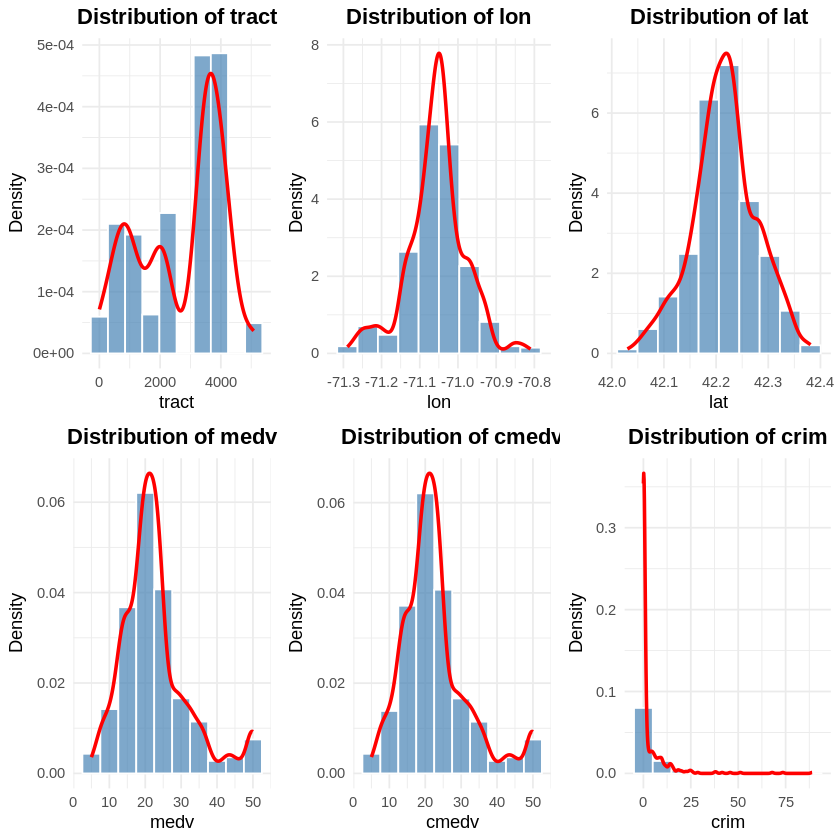

In [ ]:
# Distributions with Histograms and Density Plots
plot_list <- list()
for (var in names(numerical_vars)[1:min(12, ncol(numerical_vars))]) {
  p <- ggplot(boston, aes_string(x = var)) +
    geom_histogram(aes(y = after_stat(density)), bins = 10, fill = "steelblue", alpha = 0.7, color = "white") +
    geom_density(color = "red", linewidth = 1) +
    labs(title = paste("Distribution of", var), x = var, y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
  plot_list[[var]] <- p
}

# Display first 6 distributions
grid.arrange(grobs = plot_list[1:6], ncol = 3)

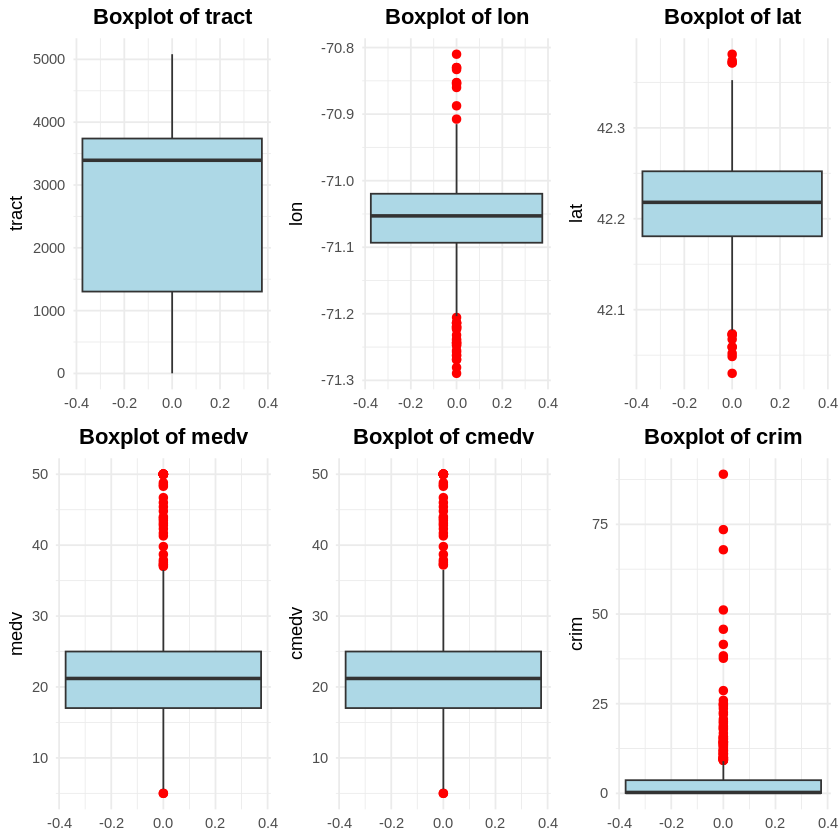

In [ ]:
# Boxplots for Outlier Detection
boxplot_list <- list()
for (var in names(numerical_vars)[1:min(12, ncol(numerical_vars))]) {
  p <- ggplot(boston, aes_string(y = var)) +
    geom_boxplot(fill = "lightblue", outlier.color = "red", outlier.size = 2) +
    labs(title = paste("Boxplot of", var), y = var) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
  boxplot_list[[var]] <- p
}

# Display first 6 boxplots
grid.arrange(grobs = boxplot_list[1:6], ncol = 3)

## 3. Univariate Analysis - Categorical Variables

In [ ]:
# Frequency tables for categorical variables
cat("\n=== CATEGORICAL VARIABLE FREQUENCIES ===\n")

if ("chas" %in% names(boston)) {
  cat("\nCharles River Dummy Variable (chas):\n")
  print(table(boston$chas))
  print(prop.table(table(boston$chas)) * 100)
}

if ("town" %in% names(boston)) {
  cat("\nTop 10 Towns by Frequency:\n")
  print(head(sort(table(boston$town), decreasing = TRUE), 10))
}


=== CATEGORICAL VARIABLE FREQUENCIES ===

Charles River Dummy Variable (chas):

  0   1 
471  35 

        0         1 
93.083004  6.916996 

Top 10 Towns by Frequency:

          Cambridge   Boston Savin Hill                Lynn      Boston Roxbury 
                 30                  23                  22                  19 
             Newton          Somerville Boston South Boston  Boston East Boston 
                 18                  15                  13                  12 
          Brookline              Quincy 
                 12                  12 


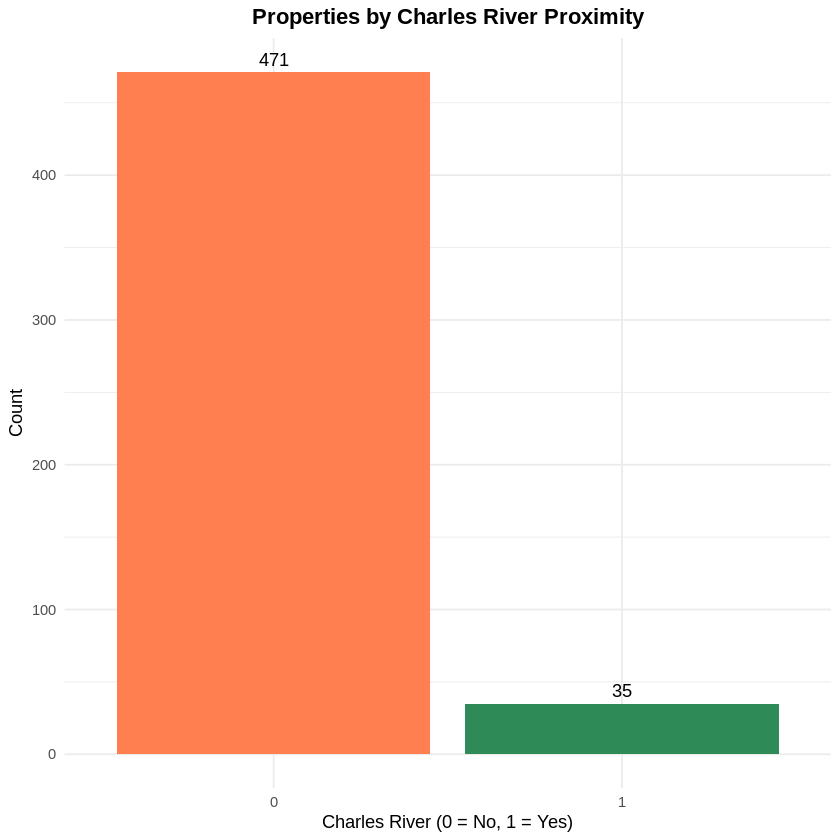

In [ ]:
# Visualize Categorical Variables
if ("chas" %in% names(boston)) {
  ggplot(boston, aes(x = factor(chas), fill = factor(chas))) +
    geom_bar() +
    geom_text(stat = 'count', aes(label = after_stat(count)), vjust = -0.5) +
    labs(title = "Properties by Charles River Proximity",
         x = "Charles River (0 = No, 1 = Yes)",
         y = "Count") +
    scale_fill_manual(values = c("0" = "coral", "1" = "seagreen")) +
    theme_minimal() +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, face = "bold"))
}

## 4. Bivariate Analysis

In [ ]:
# Correlation Matrix
cat("\n=== CORRELATION ANALYSIS ===\n")
cor_matrix <- cor(numerical_vars, use = "complete.obs")
print(round(cor_matrix, 2))


=== CORRELATION ANALYSIS ===
        tract   lon   lat  medv cmedv  crim    zn indus   nox    rm   age   dis
tract    1.00 -0.22 -0.23  0.43  0.43 -0.55  0.37 -0.58 -0.57  0.31 -0.49  0.50
lon     -0.22  1.00  0.14 -0.32 -0.32  0.07 -0.22  0.06  0.16 -0.26  0.20 -0.01
lat     -0.23  0.14  1.00  0.01  0.01 -0.08 -0.13 -0.04 -0.07 -0.07  0.08 -0.08
medv     0.43 -0.32  0.01  1.00  1.00 -0.39  0.36 -0.48 -0.43  0.70 -0.38  0.25
cmedv    0.43 -0.32  0.01  1.00  1.00 -0.39  0.36 -0.48 -0.43  0.70 -0.38  0.25
crim    -0.55  0.07 -0.08 -0.39 -0.39  1.00 -0.20  0.41  0.42 -0.22  0.35 -0.38
zn       0.37 -0.22 -0.13  0.36  0.36 -0.20  1.00 -0.53 -0.52  0.31 -0.57  0.66
indus   -0.58  0.06 -0.04 -0.48 -0.48  0.41 -0.53  1.00  0.76 -0.39  0.64 -0.71
nox     -0.57  0.16 -0.07 -0.43 -0.43  0.42 -0.52  0.76  1.00 -0.30  0.73 -0.77
rm       0.31 -0.26 -0.07  0.70  0.70 -0.22  0.31 -0.39 -0.30  1.00 -0.24  0.21
age     -0.49  0.20  0.08 -0.38 -0.38  0.35 -0.57  0.64  0.73 -0.24  1.00 -0.75
dis      0

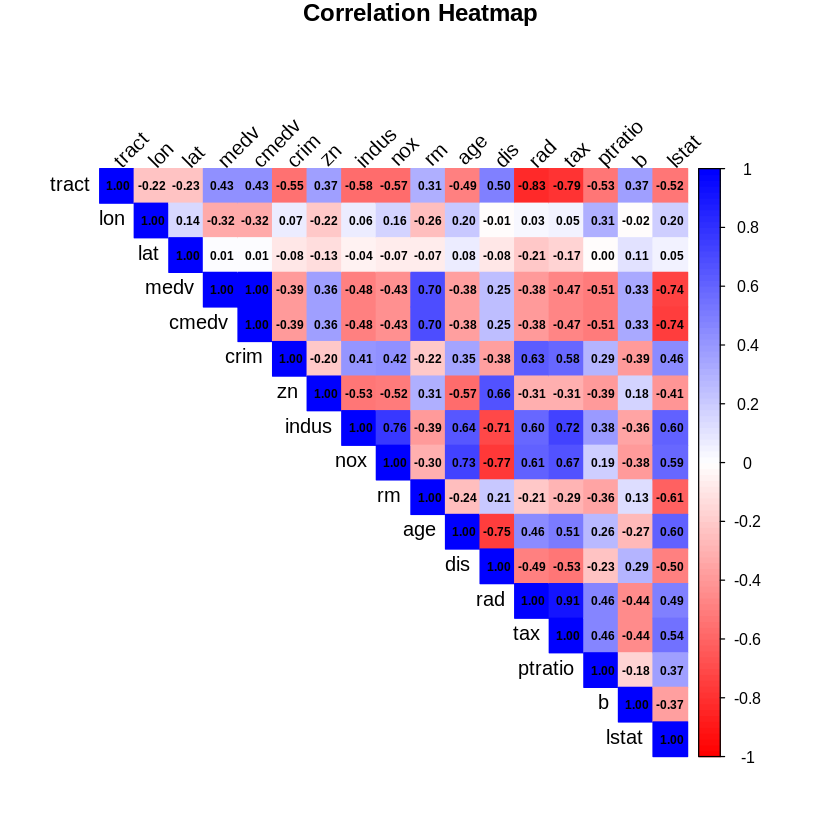

In [ ]:
# Correlation Heatmap
corrplot(cor_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.6,
         col = colorRampPalette(c("red", "white", "blue"))(100),
         title = "Correlation Heatmap", mar = c(0,0,1,0))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


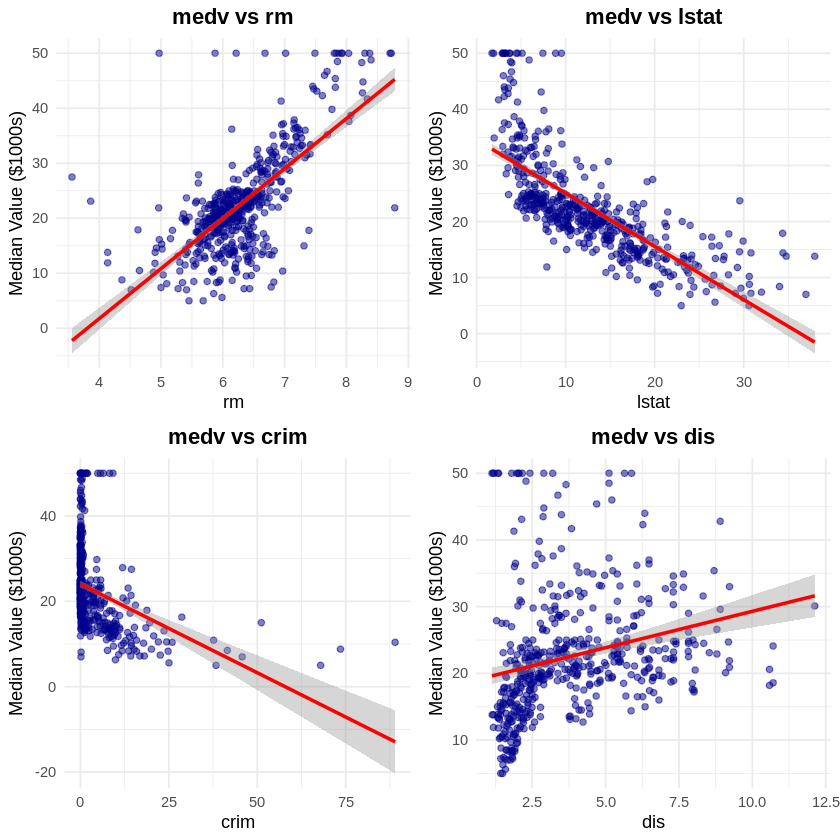

In [ ]:
# Key Relationships with Target Variable (medv)
key_vars <- c("rm", "lstat", "crim", "dis", "nox", "ptratio")
scatter_plots <- list()

for (var in key_vars) {
  p <- ggplot(boston, aes_string(x = var, y = "medv")) +
    geom_point(alpha = 0.5, color = "darkblue") +
    geom_smooth(method = "lm", color = "red", se = TRUE) +
    labs(title = paste("medv vs", var), x = var, y = "Median Value ($1000s)") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
  scatter_plots[[var]] <- p
}

grid.arrange(grobs = scatter_plots[1:4], ncol = 2)

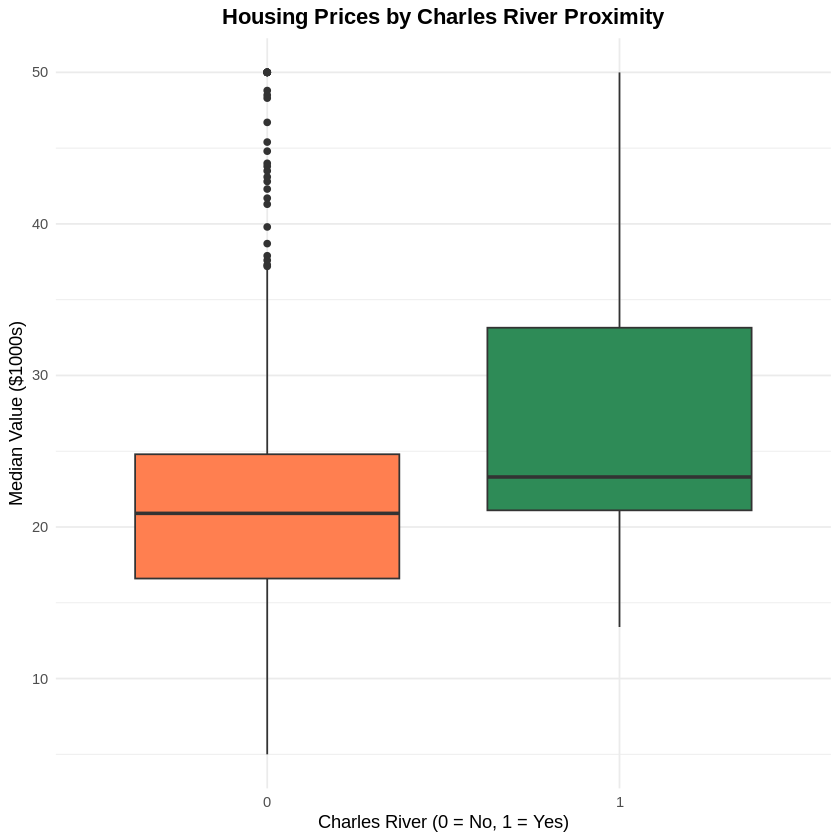

In [ ]:
# Categorical vs Numerical: Charles River effect
if ("chas" %in% names(boston)) {
  ggplot(boston, aes(x = factor(chas), y = medv, fill = factor(chas))) +
    geom_boxplot() +
    labs(title = "Housing Prices by Charles River Proximity",
         x = "Charles River (0 = No, 1 = Yes)",
         y = "Median Value ($1000s)") +
    scale_fill_manual(values = c("0" = "coral", "1" = "seagreen")) +
    theme_minimal() +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, face = "bold"))
}

## 5. Multivariate Analysis

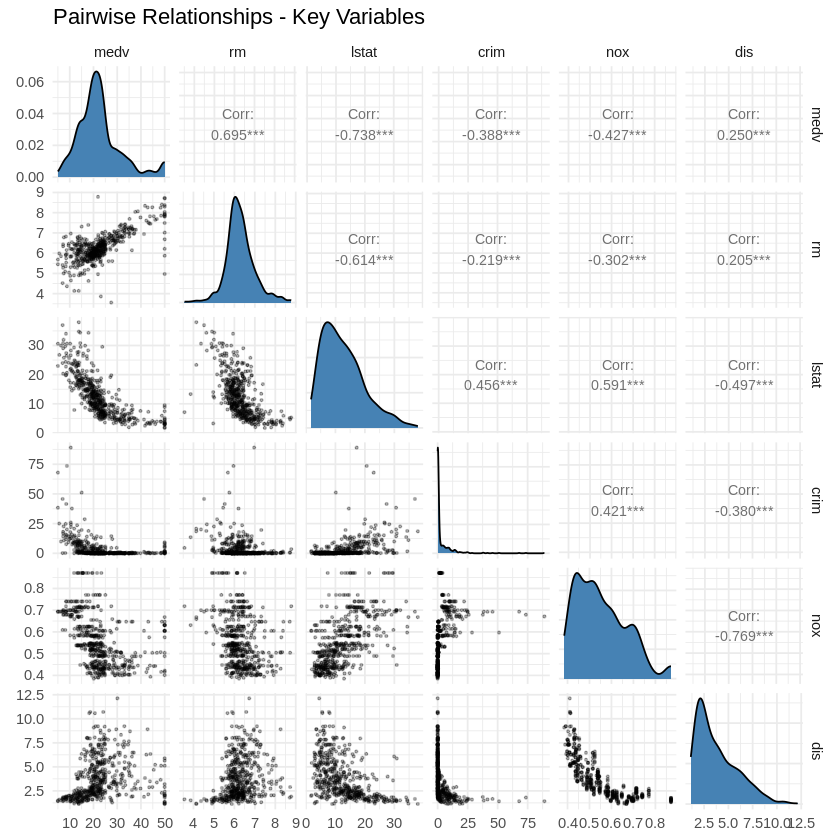

In [ ]:
# Pair Plot for Key Variables
key_data <- boston %>% select(medv, rm, lstat, crim, nox, dis)
ggpairs(key_data,
        title = "Pairwise Relationships - Key Variables",
        lower = list(continuous = wrap("points", alpha = 0.3, size = 0.5)),
        diag = list(continuous = wrap("densityDiag", fill = "steelblue")),
        upper = list(continuous = wrap("cor", size = 3))) +
  theme_minimal()

## 6. Geographic Analysis


=== GEOGRAPHIC VISUALIZATION ===


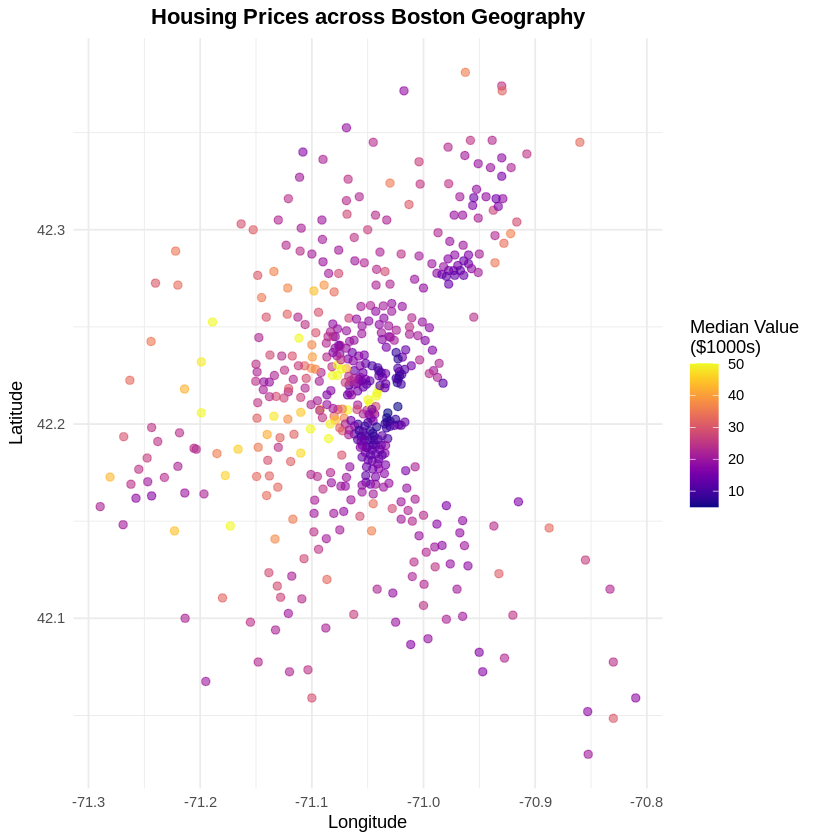

In [ ]:
if (all(c("lon", "lat") %in% names(boston))) {
  cat("\n=== GEOGRAPHIC VISUALIZATION ===\n")

  # Price by Location
  print(ggplot(boston, aes(x = lon, y = lat, color = medv)) +
    geom_point(size = 2, alpha = 0.6) +
    scale_color_viridis(option = "plasma", name = "Median Value\n($1000s)") +
    labs(title = "Housing Prices across Boston Geography",
         x = "Longitude", y = "Latitude") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold")))
}

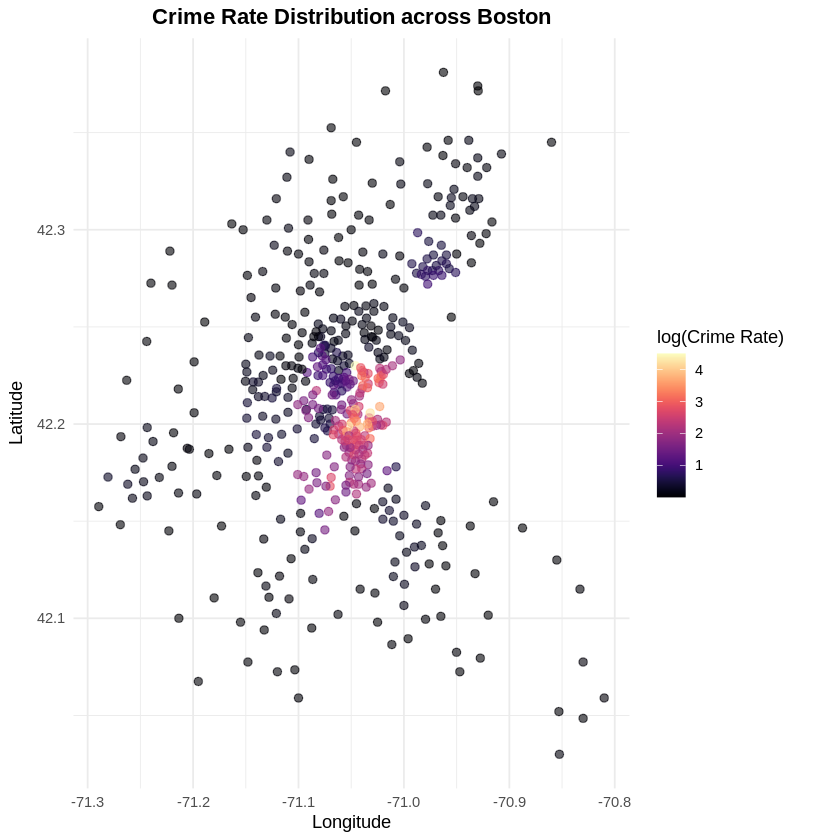

In [ ]:
if (all(c("lon", "lat") %in% names(boston))) {
  # Crime Rate by Location
  print(ggplot(boston, aes(x = lon, y = lat, color = log(crim + 1))) +
    geom_point(size = 2, alpha = 0.6) +
    scale_color_viridis(option = "magma", name = "log(Crime Rate)") +
    labs(title = "Crime Rate Distribution across Boston",
         x = "Longitude", y = "Latitude") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold")))
}

## 7. Outlier Detection

In [ ]:
cat("\n=== OUTLIER DETECTION (IQR Method) ===\n")

detect_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_val <- Q3 - Q1
  lower <- Q1 - 1.5 * IQR_val
  upper <- Q3 + 1.5 * IQR_val
  outliers <- sum(x < lower | x > upper, na.rm = TRUE)
  return(outliers)
}

outlier_summary <- data.frame(
  Variable = names(numerical_vars),
  Outlier_Count = sapply(numerical_vars, detect_outliers),
  Outlier_Percent = round(sapply(numerical_vars, detect_outliers) / nrow(boston) * 100, 2)
)
print(outlier_summary[outlier_summary$Outlier_Count > 0, ])


=== OUTLIER DETECTION (IQR Method) ===
        Variable Outlier_Count Outlier_Percent
lon          lon            35            6.92
lat          lat            13            2.57
medv        medv            40            7.91
cmedv      cmedv            39            7.71
crim        crim            66           13.04
zn            zn            68           13.44
rm            rm            30            5.93
dis          dis             5            0.99
ptratio  ptratio            15            2.96
b              b            77           15.22
lstat      lstat             7            1.38


## 8. Feature Engineering

In [ ]:
cat("\n=== FEATURE ENGINEERING ===\n")

boston_enhanced <- boston %>%
  mutate(
    # Crime rate categories
    crime_level = cut(crim,
                      breaks = c(-Inf, quantile(crim, c(0.33, 0.67)), Inf),
                      labels = c("Low", "Medium", "High")),

    # Room density (rooms per age unit)
    room_density = rm / (age + 1),

    # Accessibility index (combining rad and tax)
    accessibility_index = rad * tax / 1000,

    # Distance to employment (categorized)
    distance_category = cut(dis,
                           breaks = c(-Inf, 3, 5, Inf),
                           labels = c("Near", "Moderate", "Far")),

    # Large homes indicator
    large_home = ifelse(rm >= 7, 1, 0),

    # High crime indicator
    high_crime = ifelse(crim > median(crim), 1, 0)
  )

cat("New features created successfully!\n")
cat(paste("New columns:", paste(setdiff(names(boston_enhanced), names(boston)), collapse = ", "), "\n"))


=== FEATURE ENGINEERING ===
New features created successfully!
New columns: crime_level, room_density, accessibility_index, distance_category, large_home, high_crime 


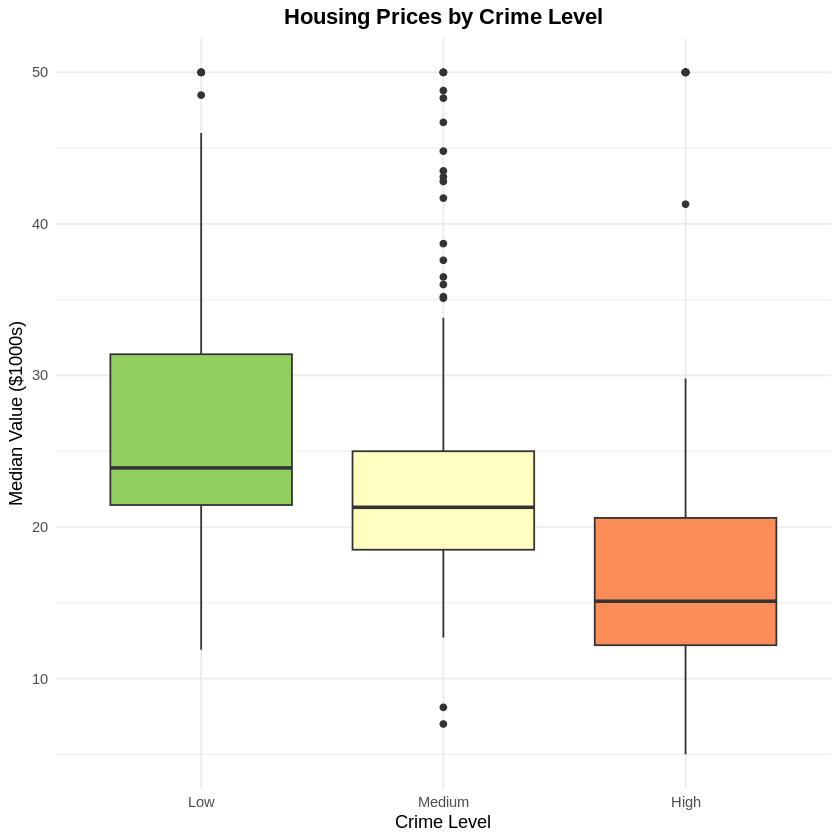

In [ ]:
# Visualize new features
ggplot(boston_enhanced, aes(x = crime_level, y = medv, fill = crime_level)) +
  geom_boxplot() +
  labs(title = "Housing Prices by Crime Level",
       x = "Crime Level", y = "Median Value ($1000s)") +
  scale_fill_brewer(palette = "RdYlGn", direction = -1) +
  theme_minimal() +
  theme(legend.position = "none", plot.title = element_text(hjust = 0.5, face = "bold"))

## 9. Statistical Tests

In [ ]:
cat("\n=== STATISTICAL TESTS ===\n")

# Normality Tests (Shapiro-Wilk for sample)
cat("\nNormality Tests (Shapiro-Wilk) for Key Variables:\n")
test_vars <- c("medv", "rm", "lstat", "crim")
for (var in test_vars) {
  if (var %in% names(boston)) {
    sample_data <- sample(boston[[var]], min(5000, length(boston[[var]])))
    test_result <- shapiro.test(sample_data)
    cat(paste(var, ": W =", round(test_result$statistic, 4),
              ", p-value =", format(test_result$p.value, scientific = TRUE), "\n"))
  }
}


=== STATISTICAL TESTS ===

Normality Tests (Shapiro-Wilk) for Key Variables:
medv : W = 0.9172 , p-value = 4.941386e-16 
rm : W = 0.9609 , p-value = 2.411977e-10 
lstat : W = 0.9369 , p-value = 8.286632e-14 
crim : W = 0.45 , p-value = 1.328589e-36 


In [ ]:
# Correlation Significance
cat("\nSignificant Correlations with medv (p < 0.05):\n")
cor_tests <- lapply(names(numerical_vars)[names(numerical_vars) != "medv"], function(var) {
  test <- cor.test(boston$medv, boston[[var]])
  data.frame(Variable = var,
             Correlation = round(test$estimate, 3),
             P_value = format(test$p.value, scientific = TRUE))
})
cor_test_df <- do.call(rbind, cor_tests) %>% arrange(desc(abs(Correlation)))
print(cor_test_df)


Significant Correlations with medv (p < 0.05):
      Variable Correlation      P_value
cor3     cmedv       0.998        0e+00
cor15    lstat      -0.738 5.081103e-88
cor8        rm       0.695 2.487229e-74
cor13  ptratio      -0.508 1.609509e-34
cor6     indus      -0.484  4.90026e-31
cor12      tax      -0.469 5.637734e-29
cor7       nox      -0.427 7.065042e-24
cor      tract       0.426 9.070375e-24
cor4      crim      -0.388 1.173987e-19
cor11      rad      -0.382 5.465933e-19
cor9       age      -0.377 1.569982e-18
cor5        zn       0.360 5.713584e-17
cor14        b       0.333 1.318113e-14
cor1       lon      -0.321 1.456311e-13
cor10      dis       0.250 1.206612e-08
cor2       lat       0.010 8.283904e-01


In [ ]:
# ANOVA for categorical variables
if ("chas" %in% names(boston)) {
  cat("\nANOVA: Effect of Charles River on Housing Prices:\n")
  anova_result <- aov(medv ~ factor(chas), data = boston)
  print(summary(anova_result))
}


ANOVA: Effect of Charles River on Housing Prices:
              Df Sum Sq Mean Sq F value   Pr(>F)    
factor(chas)   1   1312  1312.1   15.97 7.39e-05 ***
Residuals    504  41404    82.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## 10. Key Insights Summary

In [ ]:
cat("\n=== KEY INSIGHTS ===\n")
cat("1. Target Variable (medv) Range:", range(boston$medv, na.rm = TRUE)[1], "-",
    range(boston$medv, na.rm = TRUE)[2], "$1000s\n")
cat("2. Strongest Positive Correlation with medv:",
    names(which.max(cor_matrix["medv", cor_matrix["medv",] != 1])), "\n")
cat("3. Strongest Negative Correlation with medv:",
    names(which.min(cor_matrix["medv",])), "\n")
cat("4. Most Skewed Variable:",
    skew_kurt$Variable[which.max(abs(skew_kurt$Skewness))], "\n")
cat("5. Variable with Most Outliers:",
    outlier_summary$Variable[which.max(outlier_summary$Outlier_Count)], "\n")

cat("\n=== EDA COMPLETE ===\n")


=== KEY INSIGHTS ===
1. Target Variable (medv) Range: 5 - 50 $1000s
2. Strongest Positive Correlation with medv: cmedv 
3. Strongest Negative Correlation with medv: lstat 
4. Most Skewed Variable: crim 
5. Variable with Most Outliers: b 

=== EDA COMPLETE ===


---

---

# PART 2: REGRESSION ANALYSIS

**Sections covered:**
- Multiple Linear Regression with VIF diagnostics
- Coefficient testing and model validation
- Logistic Regression with ROC/AUC analysis
- Model comparison and insights

---


## 1. Data Preparation for Regression

In [ ]:
# Load required libraries
install.packages("caret", dependencies = TRUE)
library(car); library(lmtest); library(caret); library(pROC)
data("BostonHousing2", package = "mlbench")
boston <- BostonHousing2 %>% na.omit()
set.seed(123)
train_index <- createDataPartition(boston$medv, p = 0.8, list = FALSE)
train_data <- boston[train_index, ]; test_data <- boston[-train_index, ]
cat("Training:", nrow(train_data), "| Testing:", nrow(test_data), "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘brglm’, ‘gtools’, ‘qvcalc’, ‘rex’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RANN’, ‘spls’, ‘superpc’, ‘themis’


Loading required package: lattice

Type 'citation("pROC")' for a citation.

Training: 407 | Testing: 99 


## 2. Multiple Linear Regression
### 2.1 Model Building

In [ ]:
mlr_model <- lm(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat, data = train_data)
summary(mlr_model)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + b + lstat, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9550  -2.7996  -0.4647   1.7767  25.0993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.733617   5.619935   6.714 6.63e-11 ***
crim         -0.093857   0.039157  -2.397 0.016999 *  
zn            0.039436   0.015987   2.467 0.014062 *  
indus        -0.012988   0.069595  -0.187 0.852059    
chas1         2.290187   0.940621   2.435 0.015346 *  
nox         -17.130560   4.342272  -3.945 9.45e-05 ***
rm            3.499219   0.451445   7.751 7.87e-14 ***
age           0.009823   0.015510   0.633 0.526905    
dis          -1.390769   0.230614  -6.031 3.77e-09 ***
rad           0.330939   0.077135   4.290 2.25e-05 ***
tax          -0.012386   0.004342  -2.852 0.004568 ** 
ptratio      -0.960676   0.150307  -6.391 4.66e-10 ***
b             0.009841   0.00293

### 2.2 Multicollinearity Diagnostics (VIF)

        Variable   VIF   Status
tax          tax 9.660 MODERATE
rad          rad 8.153 MODERATE
nox          nox 4.448      LOW
dis          dis 4.065      LOW
indus      indus 3.956      LOW
age          age 3.214      LOW
lstat      lstat 3.132      LOW
zn            zn 2.323      LOW
rm            rm 1.912      LOW
ptratio  ptratio 1.852      LOW
crim        crim 1.845      LOW
b              b 1.365      LOW
chas        chas 1.067      LOW


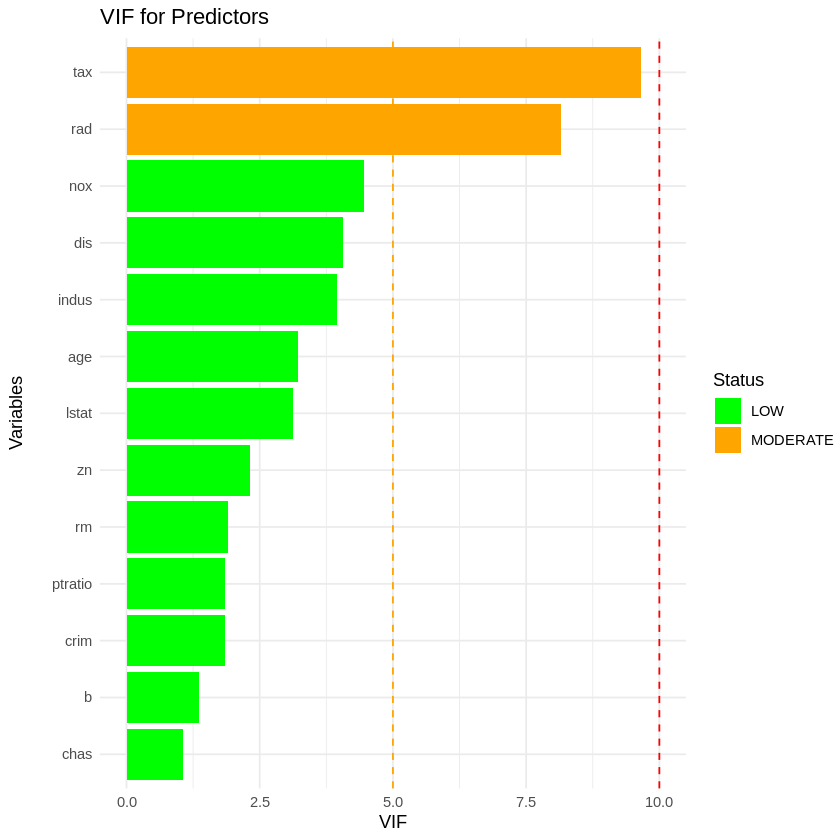

In [ ]:
vif_values <- vif(mlr_model)
vif_df <- data.frame(Variable = names(vif_values), VIF = round(vif_values, 3),
                     Status = ifelse(vif_values > 10, "HIGH", ifelse(vif_values > 5, "MODERATE", "LOW")))
print(vif_df[order(-vif_df$VIF), ])
ggplot(vif_df, aes(x = reorder(Variable, VIF), y = VIF, fill = Status)) + geom_bar(stat = "identity") +
  geom_hline(yintercept = c(5, 10), linetype = "dashed", color = c("orange", "red")) + coord_flip() +
  scale_fill_manual(values = c("LOW" = "green", "MODERATE" = "orange", "HIGH" = "red")) +
  labs(title = "VIF for Predictors", x = "Variables", y = "VIF") + theme_minimal()

In [ ]:
mlr_refined <- lm(medv ~ crim + zn + indus + chas + nox + rm + age + dis + ptratio + b + lstat, data = train_data)
cat("Refined Model VIF:\n"); print(round(vif(mlr_refined), 3))
summary(mlr_refined)

Refined Model VIF:
   crim      zn   indus    chas     nox      rm     age     dis ptratio       b 
  1.536   2.156   3.343   1.047   3.920   1.860   3.190   4.063   1.561   1.329 
  lstat 
  3.128 



Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + ptratio + b + lstat, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0477  -2.6724  -0.6064   1.4995  26.9684 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.971143   5.409796   5.540 5.53e-08 ***
crim         -0.038908   0.036508  -1.066  0.28719    
zn            0.036400   0.015735   2.313  0.02122 *  
indus        -0.062337   0.065361  -0.954  0.34080    
chas1         2.672298   0.952059   2.807  0.00525 ** 
nox         -13.400451   4.165012  -3.217  0.00140 ** 
rm            3.816563   0.454979   8.388 8.83e-16 ***
age           0.004233   0.015787   0.268  0.78872    
dis          -1.408730   0.235548  -5.981 4.98e-09 ***
ptratio      -0.796281   0.140992  -5.648 3.11e-08 ***
b             0.008569   0.002959   2.896  0.00399 ** 
lstat        -0.555980   0.060425  -9.201  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

### 2.3 Tests for Regression Coefficients

In [ ]:
coef_summary <- summary(mlr_refined)$coefficients
coef_df <- data.frame(Variable = rownames(coef_summary), Estimate = round(coef_summary[,1], 4),
  Std_Error = round(coef_summary[,2], 4), t_value = round(coef_summary[,3], 3), p_value = format(coef_summary[,4], scientific = TRUE),
  Significance = ifelse(coef_summary[,4] < 0.001, "***", ifelse(coef_summary[,4] < 0.01, "**", ifelse(coef_summary[,4] < 0.05, "*", ""))))
print(coef_df)
conf_int <- confint(mlr_refined, level = 0.95); cat("\n95% CI:\n"); print(round(conf_int, 4))

               Variable Estimate Std_Error t_value      p_value Significance
(Intercept) (Intercept)  29.9711    5.4098   5.540 5.528276e-08          ***
crim               crim  -0.0389    0.0365  -1.066 2.871930e-01             
zn                   zn   0.0364    0.0157   2.313 2.121551e-02            *
indus             indus  -0.0623    0.0654  -0.954 3.407954e-01             
chas1             chas1   2.6723    0.9521   2.807 5.250492e-03           **
nox                 nox -13.4005    4.1650  -3.217 1.400333e-03           **
rm                   rm   3.8166    0.4550   8.388 8.833529e-16          ***
age                 age   0.0042    0.0158   0.268 7.887231e-01             
dis                 dis  -1.4087    0.2355  -5.981 4.979973e-09          ***
ptratio         ptratio  -0.7963    0.1410  -5.648 3.113450e-08          ***
b                     b   0.0086    0.0030   2.896 3.990768e-03           **
lstat             lstat  -0.5560    0.0604  -9.201 2.081220e-18          ***

In [ ]:
f_stat <- summary(mlr_refined)$fstatistic; p_value <- pf(f_stat[1], f_stat[2], f_stat[3], lower.tail = FALSE)
cat("F-statistic:", f_stat[1], "| p-value:", format(p_value, scientific = TRUE), "\n")

F-statistic: 93.06074 | p-value: 2.166251e-102 


### 2.4 Regression Assumptions

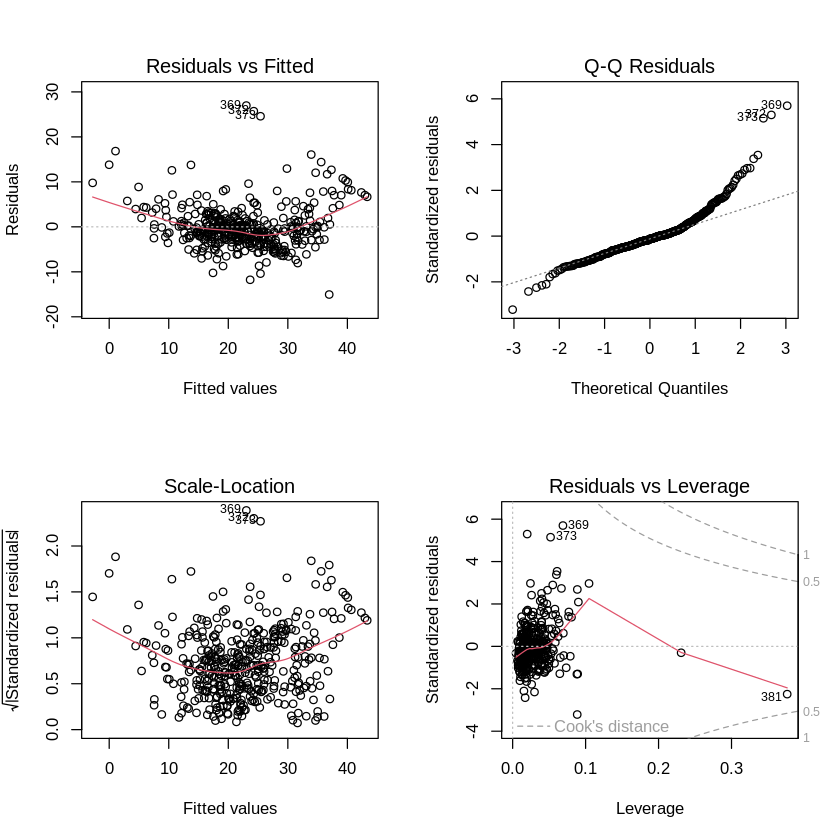

In [ ]:
par(mfrow = c(2, 2)); plot(mlr_refined); par(mfrow = c(1, 1))

In [ ]:
bp_test <- bptest(mlr_refined); print(bp_test)
cat("Interpretation:", ifelse(bp_test$p.value < 0.05, "Heteroscedasticity detected", "Homoscedasticity OK"), "\n")
dw_test <- durbinWatsonTest(mlr_refined); print(dw_test)


	studentized Breusch-Pagan test

data:  mlr_refined
BP = 48.159, df = 11, p-value = 1.337e-06

Interpretation: Heteroscedasticity detected 
 lag Autocorrelation D-W Statistic p-value
   1       0.4149478      1.149864       0
 Alternative hypothesis: rho != 0


### 2.5 Model Performance & Validation

In [ ]:
train_pred <- predict(mlr_refined, train_data); test_pred <- predict(mlr_refined, test_data)
train_rmse <- sqrt(mean((train_data$medv - train_pred)^2)); test_rmse <- sqrt(mean((test_data$medv - test_pred)^2))
train_r2 <- summary(mlr_refined)$r.squared; test_r2 <- 1 - sum((test_data$medv - test_pred)^2) / sum((test_data$medv - mean(test_data$medv))^2)
cat("TRAINING: RMSE=", round(train_rmse,4), "| R²=", round(train_r2,4), "\n")
cat("TESTING:  RMSE=", round(test_rmse,4), "| R²=", round(test_r2,4), "\n")

TRAINING: RMSE= 4.8317 | R²= 0.7216 
TESTING:  RMSE= 4.6288 | R²= 0.7531 


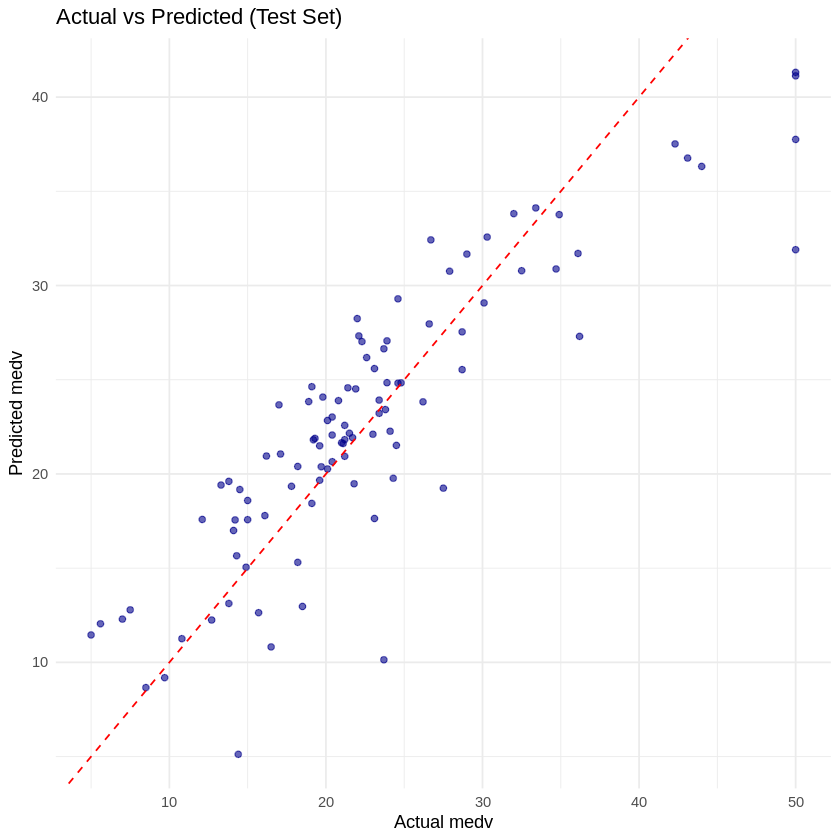

In [ ]:
results_df <- data.frame(Actual = test_data$medv, Predicted = test_pred)
ggplot(results_df, aes(x = Actual, y = Predicted)) + geom_point(alpha = 0.6, color = "darkblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Actual vs Predicted (Test Set)", x = "Actual medv", y = "Predicted medv") + theme_minimal()

## 3. Logistic Regression
### 3.1 Binary Target Creation

In [ ]:
median_price <- median(boston$medv); boston$high_value <- ifelse(boston$medv > median_price, 1, 0)
cat("Median price:", median_price, "\n"); print(table(boston$high_value))
train_log <- boston[train_index, ]; test_log <- boston[-train_index, ]

Median price: 21.2 

  0   1 
256 250 


### 3.2 Build Logistic Model

In [ ]:
log_model <- glm(high_value ~ crim + zn + indus + chas + nox + rm + age + dis + ptratio + b + lstat,
                data = train_log, family = binomial); summary(log_model)


Call:
glm(formula = high_value ~ crim + zn + indus + chas + nox + rm + 
    age + dis + ptratio + b + lstat, family = binomial, data = train_log)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.738073   4.194576   1.845 0.065069 .  
crim         0.001666   0.026927   0.062 0.950666    
zn           0.002886   0.012953   0.223 0.823670    
indus        0.054444   0.044450   1.225 0.220636    
chas1        2.454104   0.733458   3.346 0.000820 ***
nox         -6.801912   3.128849  -2.174 0.029710 *  
rm           1.190532   0.442300   2.692 0.007109 ** 
age         -0.004475   0.011356  -0.394 0.693554    
dis         -0.485111   0.161847  -2.997 0.002723 ** 
ptratio     -0.418823   0.108495  -3.860 0.000113 ***
b            0.007371   0.004073   1.810 0.070307 .  
lstat       -0.415856   0.067154  -6.193 5.92e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null d

### 3.3 Odds Ratios

In [ ]:
odds_ratios <- exp(coef(log_model)); conf_int_log <- exp(confint(log_model))
odds_df <- data.frame(Variable = names(odds_ratios), Odds_Ratio = round(odds_ratios, 4),
  CI_Lower = round(conf_int_log[,1], 4), CI_Upper = round(conf_int_log[,2], 4)); print(odds_df)

Waiting for profiling to be done...



               Variable Odds_Ratio CI_Lower     CI_Upper
(Intercept) (Intercept)  2294.0484   0.6362 9170682.9711
crim               crim     1.0017   0.9257       1.0521
zn                   zn     1.0029   0.9786       1.0298
indus             indus     1.0560   0.9672       1.1525
chas1             chas1    11.6360   2.9465      53.9611
nox                 nox     0.0011   0.0000       0.4642
rm                   rm     3.2888   1.4584       8.2446
age                 age     0.9955   0.9734       1.0179
dis                 dis     0.6156   0.4424       0.8376
ptratio         ptratio     0.6578   0.5261       0.8069
b                     b     1.0074   1.0006       1.0173
lstat             lstat     0.6598   0.5735       0.7464


### 3.4 Performance Metrics

In [ ]:
test_prob <- predict(log_model, test_log, type = "response"); test_pred_class <- ifelse(test_prob > 0.5, 1, 0)
test_conf <- confusionMatrix(factor(test_pred_class), factor(test_log$high_value)); print(test_conf)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 42  8
         1  8 41
                                          
               Accuracy : 0.8384          
                 95% CI : (0.7509, 0.9047)
    No Information Rate : 0.5051          
    P-Value [Acc > NIR] : 4.317e-12       
                                          
                  Kappa : 0.6767          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8400          
            Specificity : 0.8367          
         Pos Pred Value : 0.8400          
         Neg Pred Value : 0.8367          
             Prevalence : 0.5051          
         Detection Rate : 0.4242          
   Detection Prevalence : 0.5051          
      Balanced Accuracy : 0.8384          
                                          
       'Positive' Class : 0               
                                    

### 3.5 ROC Curve & AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.9163 


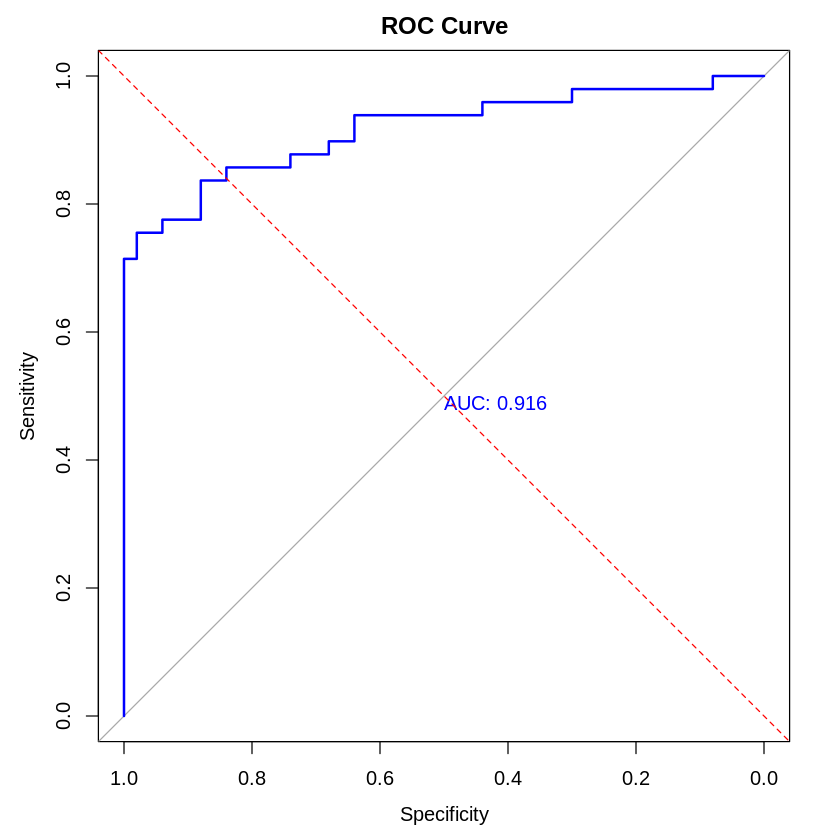

In [ ]:
roc_obj <- roc(test_log$high_value, test_prob); auc_value <- auc(roc_obj)
cat("AUC:", round(auc_value, 4), "\n")
plot(roc_obj, main = "ROC Curve", col = "blue", lwd = 2, print.auc = TRUE); abline(a = 0, b = 1, lty = 2, col = "red")

## 4. Model Comparison & Insights

In [ ]:
cat("LINEAR REGRESSION: R²=", round(test_r2,4), "| RMSE=", round(test_rmse,4), "\n")
cat("LOGISTIC REGRESSION: Accuracy=", round(test_conf$overall['Accuracy'],4), "| AUC=", round(auc_value,4), "\n")

LINEAR REGRESSION: R²= 0.7531 | RMSE= 4.6288 
LOGISTIC REGRESSION: Accuracy= 0.8384 | AUC= 0.9163 
